In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
img    = cv2.imread('archive/images/Cars1.png', )
# cv2.imshow('HelloWorld', img)
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

newImg = cv2.blur(grey,(5,5))
img    = newImg

laplacian   = cv2.Laplacian(img,cv2.CV_64F)
sobelx      = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
sobely      = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

cv2.imshow('HelloWorld', sobelx)
cv2.waitKey(0)
cv2.destroyAllWindows()


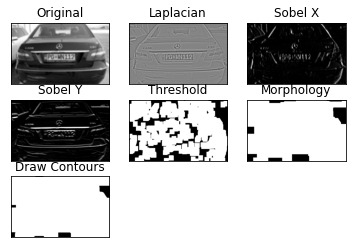

In [9]:

#aplicado o threshold sobre o Sobel de X
tmp, imgThs = cv2.threshold(sobelx,0,255,cv2.THRESH_BINARY)

#pequena chacoalhada nos pixels pra ver o que cai (isso limpa a img mas
#distancia as regioes, experimente)
krl      = np.ones((6,6),np.uint8)
erosion  = cv2.erode(imgThs,krl,iterations = 1)
krl      = np.ones((19,19),np.uint8)
dilation = cv2.dilate(erosion,krl,iterations = 1) 
imgThs   = dilation

#estrutura proporcional aa placa
morph       = cv2.getStructuringElement(cv2.MORPH_RECT,(40,13))

#captura das regioes que possam conter a placa
plateDetect = cv2.morphologyEx(imgThs,cv2.MORPH_CLOSE,morph)
regionPlate = plateDetect.copy()

contours, hierarchy = cv2.findContours(regionPlate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# cv2.imshow('HelloWorld', plateDetect)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(grey)

cv2.drawContours(regionPlate,contours,-1,(255,255,255),18)
  
plt.subplot(3,3,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(3,3,2)
plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

plt.subplot(3,3,3)
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.xticks([]), plt.yticks([])

plt.subplot(3,3,4)
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])

plt.subplot(3,3,5)
plt.imshow(imgThs,cmap = 'gray')
plt.title('Threshold')
plt.xticks([]), plt.yticks([])

plt.subplot(3,3,6)
plt.imshow(plateDetect,cmap = 'gray')
plt.title('Morphology')
plt.xticks([]), plt.yticks([])

plt.subplot(3,3,7)
plt.imshow(regionPlate,cmap = 'gray')
plt.title('Draw Contours')
plt.xticks([]), plt.yticks([])

plt.show()
